# ASSIGNMENT 2 : Team 8

## `Assumptions`

* Based in the _USA_ according to all the given county, state and city names. Assuming it's the ONLY country's data

* __VIN__ stands for __Vehicle Identification Number__ and its purpose is to uniquely identify each vehicle in the country (just like a Number Plate). _DOL Vehicle ID_ stands for Department of Licensing Vehicle ID and again, seems that the purpose of it is also to uniquely ID each vehicle in the country

* Although, on checking, VIN is not unique for all the rows while DOL is unique for all rows. Thus, dropping DOLVID as there is no usecase for it since unique for all rows

## `All Imports`

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `Loading & Pre-processing Dataset`

In [2]:
MAIN_DATA = pd.read_csv("Electric_Vehicle_Data.csv")

# Total Rows & Rows with NaN (even single one of it)
print("Total rows:", len(MAIN_DATA))
print("Rows with NaN:", len(MAIN_DATA[MAIN_DATA.isnull().any(axis=1)]))
print(
    "\nThus, simply dropping all the rows with even a single NaN value as its almost a negligible number compared to total rows!"
)

# Dropping rows with NaN (even single one of it amongst the columns)
MAIN_DATA = MAIN_DATA.dropna()

# Printing all the total rows now
print("\nTotal rows Now:", len(MAIN_DATA))

# Total unique DOL Vehicle ID
print("Total unique DOL Vehicle ID:", len(MAIN_DATA["DOL Vehicle ID"].unique()))

# Dropping DOLVID column
print(
    "Dropping DOL Vehicle ID column as its unique for all rows (no generalisation possible)!"
)

# Dropping DOLVID as its of no use (unique for all so cant generalise)
MAIN_DATA.drop(columns=["DOL Vehicle ID"], inplace=True)

Total rows: 181458
Rows with NaN: 403

Thus, simply dropping all the rows with even a single NaN value as its almost a negligible number compared to total rows!

Total rows Now: 181055
Total unique DOL Vehicle ID: 181055
Dropping DOL Vehicle ID column as its unique for all rows (no generalisation possible)!


## `Unique Values (for all columns)`

In [3]:
# Renaming the VIN column
MAIN_DATA.rename(columns={"VIN (1-10)": "VIN"}, inplace=True)

# Total unique values for each of the column
print("\nTotal unique values for each of the column:")
for col in MAIN_DATA.columns:
    print(col, ":", len(MAIN_DATA[col].unique()))


Total unique values for each of the column:
VIN : 11055
County : 39
City : 468
State : 1
Postal Code : 542
Model Year : 22
Make : 40
Model : 143
Electric Vehicle Type : 2
Clean Alternative Fuel Vehicle (CAFV) Eligibility : 3
Electric Range : 103
Base MSRP : 31
Legislative District : 49
Vehicle Location : 542
Electric Utility : 75
2020 Census Tract : 1767


## `Dropping columns`

In [4]:
print("\nBelow are the columns that are dropped in the pre-processing part:")

# Removing State as there is ONLY one State unique value
print("-> Removing State as there is ONLY one State unique value!")
MAIN_DATA.drop(columns=["State"], inplace=True)

# Dropping Postal code as its redundant
print("-> Dropping Postal code as its redundant!")
MAIN_DATA.drop(columns=["Postal Code"], inplace=True)

# Dropping Legislative District
print("-> Dropping Legislative District as its not helping in any kind of data generalisation!")
MAIN_DATA.drop(columns=["Legislative District"], inplace=True)

# Dropping Latitude Longitude data as its of no use (redundant)
print("-> Dropping Latitude Longitude data as its of no use (redundant & not generalisable)!")
MAIN_DATA.drop(columns=["Vehicle Location"], inplace=True)

# Making new file for MAIN_DATA (FINAL PRE-PROCESSED DATA)
MAIN_DATA.to_csv("MAIN_DATA.csv")


Below are the columns that are dropped in the pre-processing part:
-> Removing State as there is ONLY one State unique value!
-> Dropping Postal code as its redundant!
-> Dropping Legislative District as its not helping in any kind of data generalisation!
-> Dropping Latitude Longitude data as its of no use (redundant & not generalisable)!


## `Co-Relation b/w City, County & State`

In [5]:
# Finding count of each of the unique cities
print("\nCount of each of the unique cities:")
print(MAIN_DATA["City"].value_counts())

# Finding count of each of the unique counties
print("\nCount of each of the unique counties:")
print(MAIN_DATA["County"].value_counts())


Count of each of the unique cities:
City
Seattle      30045
Bellevue      9116
Redmond       6568
Vancouver     6329
Bothell       5961
             ...  
Plymouth         1
Startup          1
Glenwood         1
Adna             1
Maryhill         1
Name: count, Length: 468, dtype: int64

Count of each of the unique counties:
County
King            94460
Snohomish       21439
Pierce          14043
Clark           10667
Thurston         6600
Kitsap           5956
Spokane          4671
Whatcom          4331
Benton           2183
Skagit           1968
Island           1921
Clallam          1079
Chelan           1078
Yakima           1034
Jefferson         994
San Juan          947
Cowlitz           935
Mason             840
Lewis             767
Grays Harbor      648
Kittitas          643
Grant             585
Franklin          585
Walla Walla       439
Douglas           369
Whitman           341
Klickitat         294
Okanogan          272
Stevens           223
Pacific           204
Skam

### Few Points

* We can notice that the dataset can have a column called Location with the addresses as _City, County, State_

* Now, we already saw that generalising to States would have made no sense as there was only one unique state in the whole dataset. Further, we can generalise the Cities to Counties

* **ASSUMPTION** : the above generalisation of cities to their counties has already been given as separate columns so without any threshold value, we are directly generalising locations to Counties

## `Next Co-Relation @Aniketh`

In [26]:
print("\nCount of each of the unique car makers:")
print(MAIN_DATA["Make"].value_counts())


Count of each of the unique car makers:
Make
TESLA                   80627
NISSAN                  14024
CHEVROLET               13838
FORD                     9503
BMW                      7666
KIA                      7632
TOYOTA                   6485
VOLKSWAGEN               5153
JEEP                     4678
HYUNDAI                  4552
RIVIAN                   4419
VOLVO                    4278
AUDI                     3729
CHRYSLER                 3039
MERCEDES-BENZ            1646
PORSCHE                  1157
MITSUBISHI                979
MINI                      925
POLESTAR                  894
SUBARU                    837
HONDA                     834
FIAT                      783
DODGE                     607
MAZDA                     506
CADILLAC                  432
LEXUS                     398
SMART                     269
LINCOLN                   269
LUCID                     238
JAGUAR                    236
GENESIS                   189
FISKER                  

In [7]:
cafv_distribution = MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print("CAFV Eligibility Distribution:")
print(cafv_distribution)

CAFV Eligibility Distribution:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    94566
Clean Alternative Fuel Vehicle Eligible                         66646
Not eligible due to low battery range                           19843
Name: count, dtype: int64


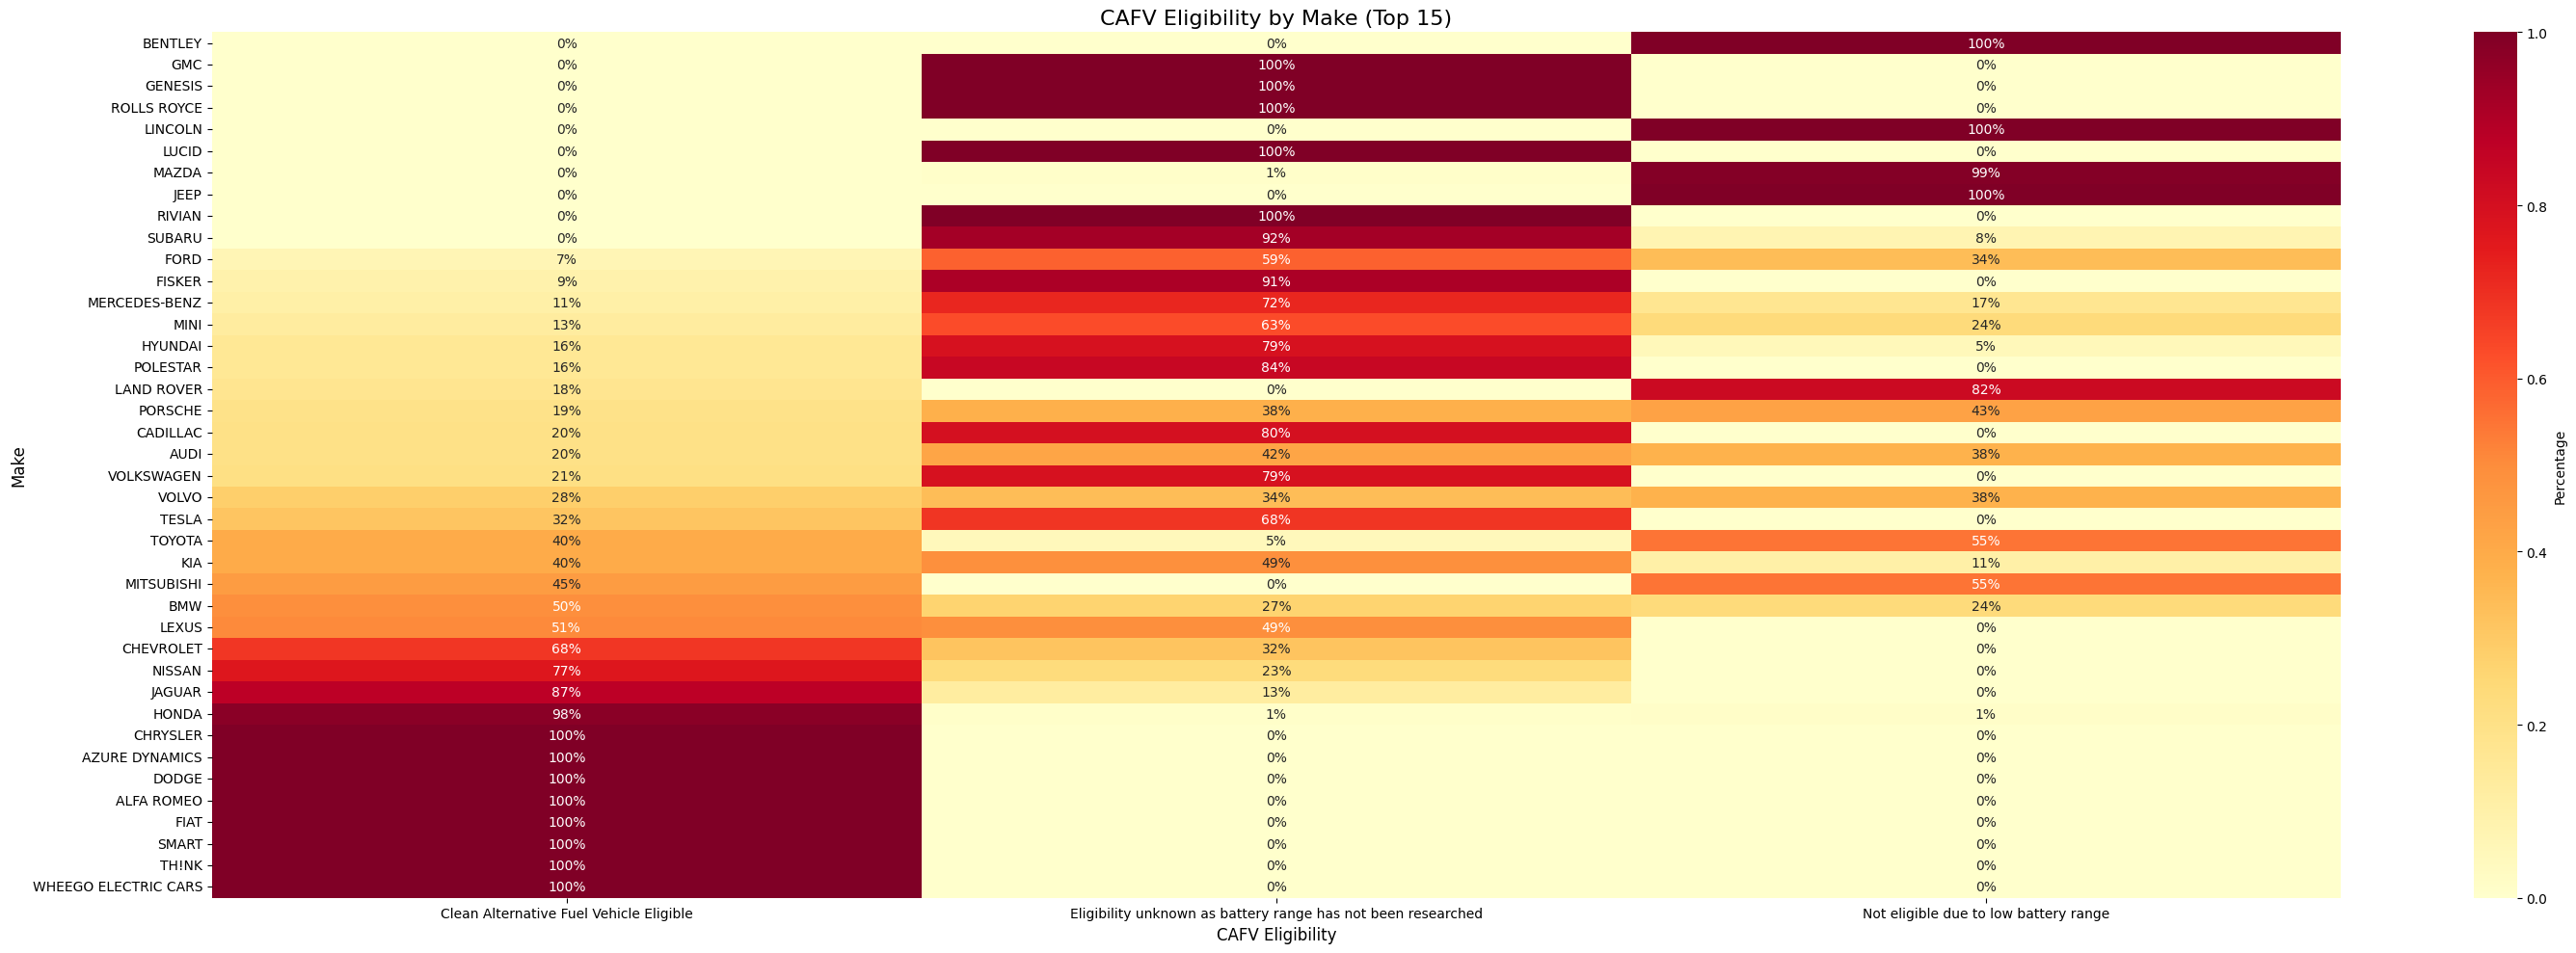

In [16]:
cafv_by_make = pd.crosstab(MAIN_DATA['Make'], MAIN_DATA['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], normalize='index')

if 'Clean Alternative Fuel Vehicle Eligible' in cafv_by_make.columns:
    cafv_by_make = cafv_by_make.sort_values('Clean Alternative Fuel Vehicle Eligible', ascending=True)

plt.figure(figsize=(30, 10))
sns.heatmap(cafv_by_make, annot=True, fmt='.0%', cmap='YlOrRd', cbar_kws={'label': 'Percentage'})

plt.title('CAFV Eligibility by Make (Top 15)', fontsize=16)
plt.ylabel('Make', fontsize=12)
plt.xlabel('CAFV Eligibility', fontsize=12)
plt.tight_layout()
plt.show()

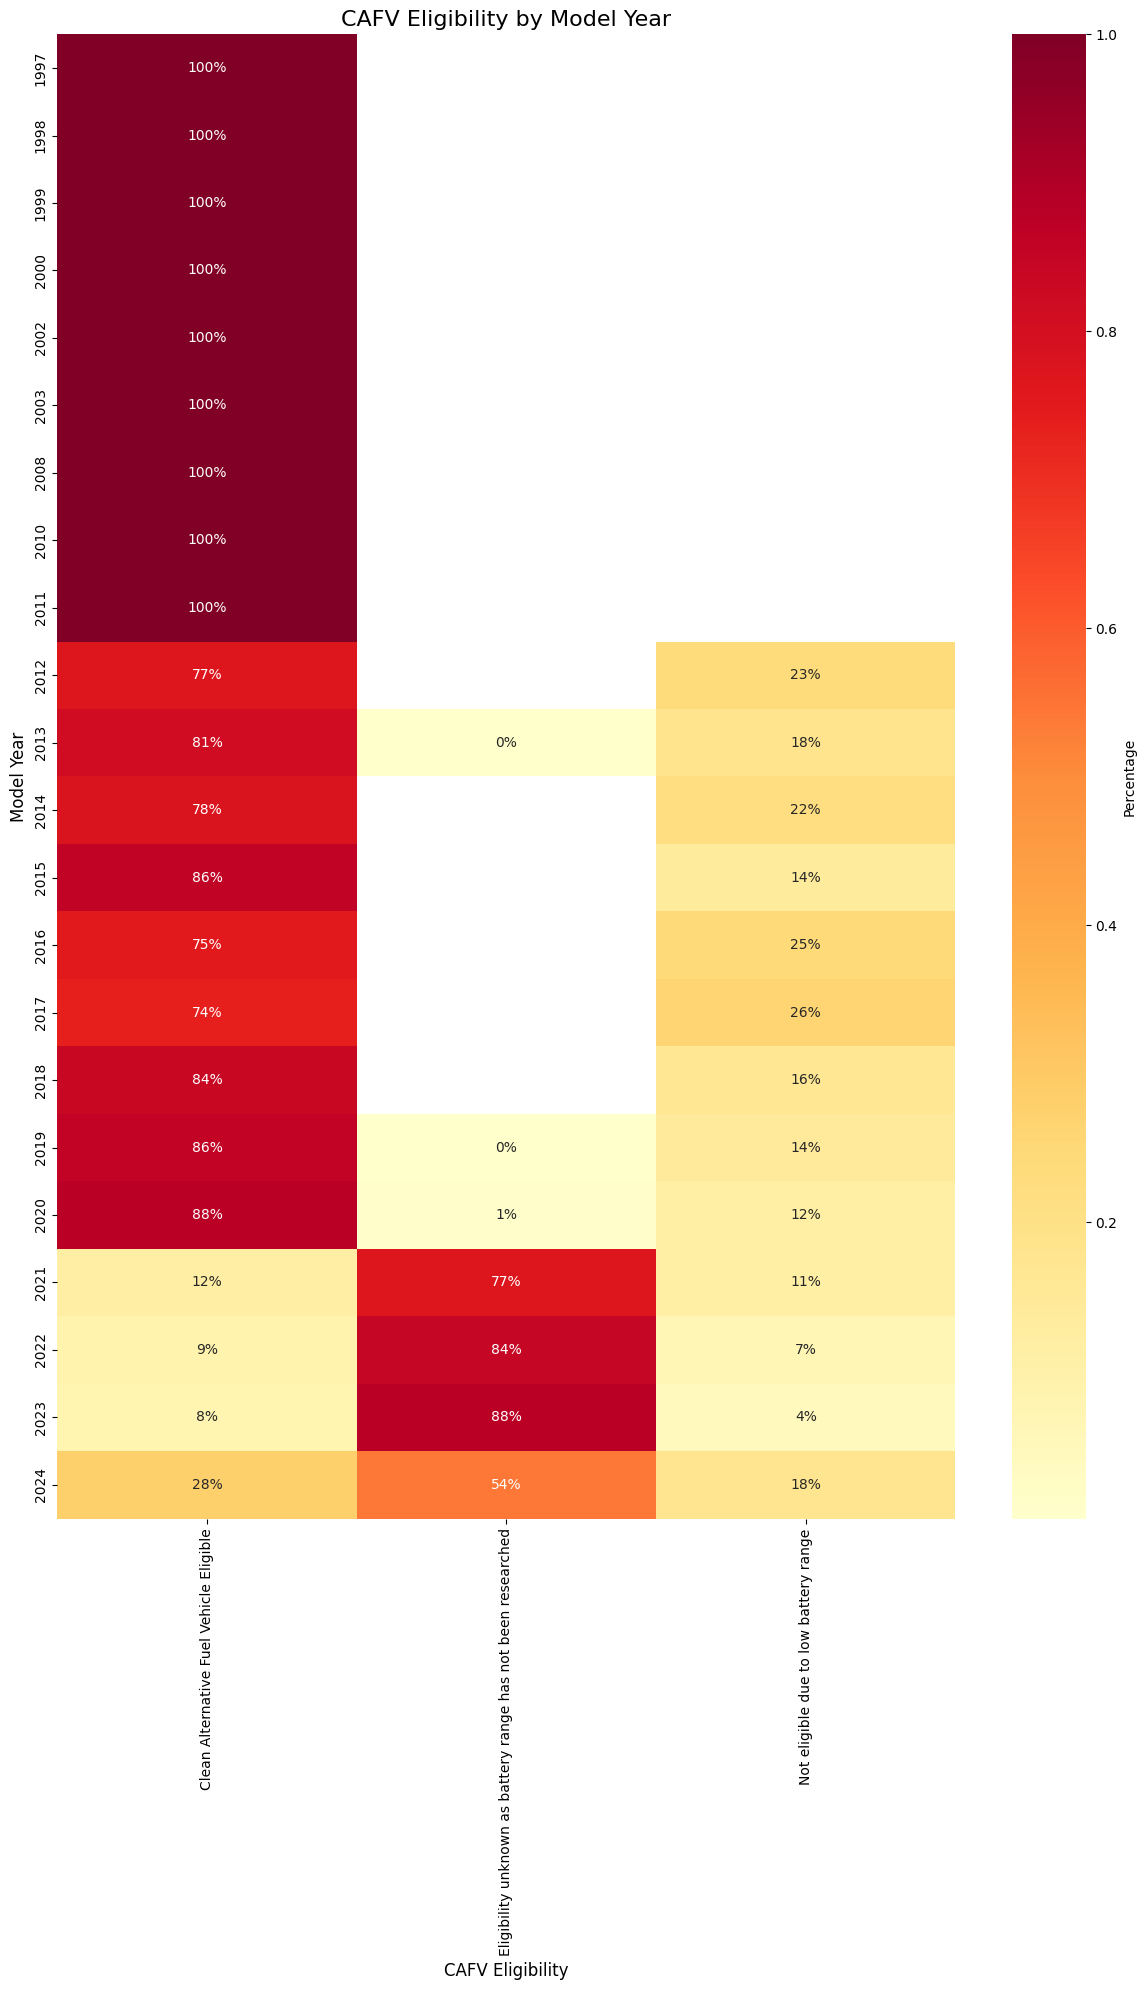

In [25]:
cafv_by_year = MAIN_DATA.groupby('Model Year')['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 20))
sns.heatmap(cafv_by_year, annot=True, fmt='.0%', cmap='YlOrRd', cbar_kws={'label': 'Percentage'})
plt.title('CAFV Eligibility by Model Year', fontsize=16)
plt.ylabel('Model Year', fontsize=12)
plt.xlabel('CAFV Eligibility', fontsize=12)
plt.tight_layout()
plt.show()

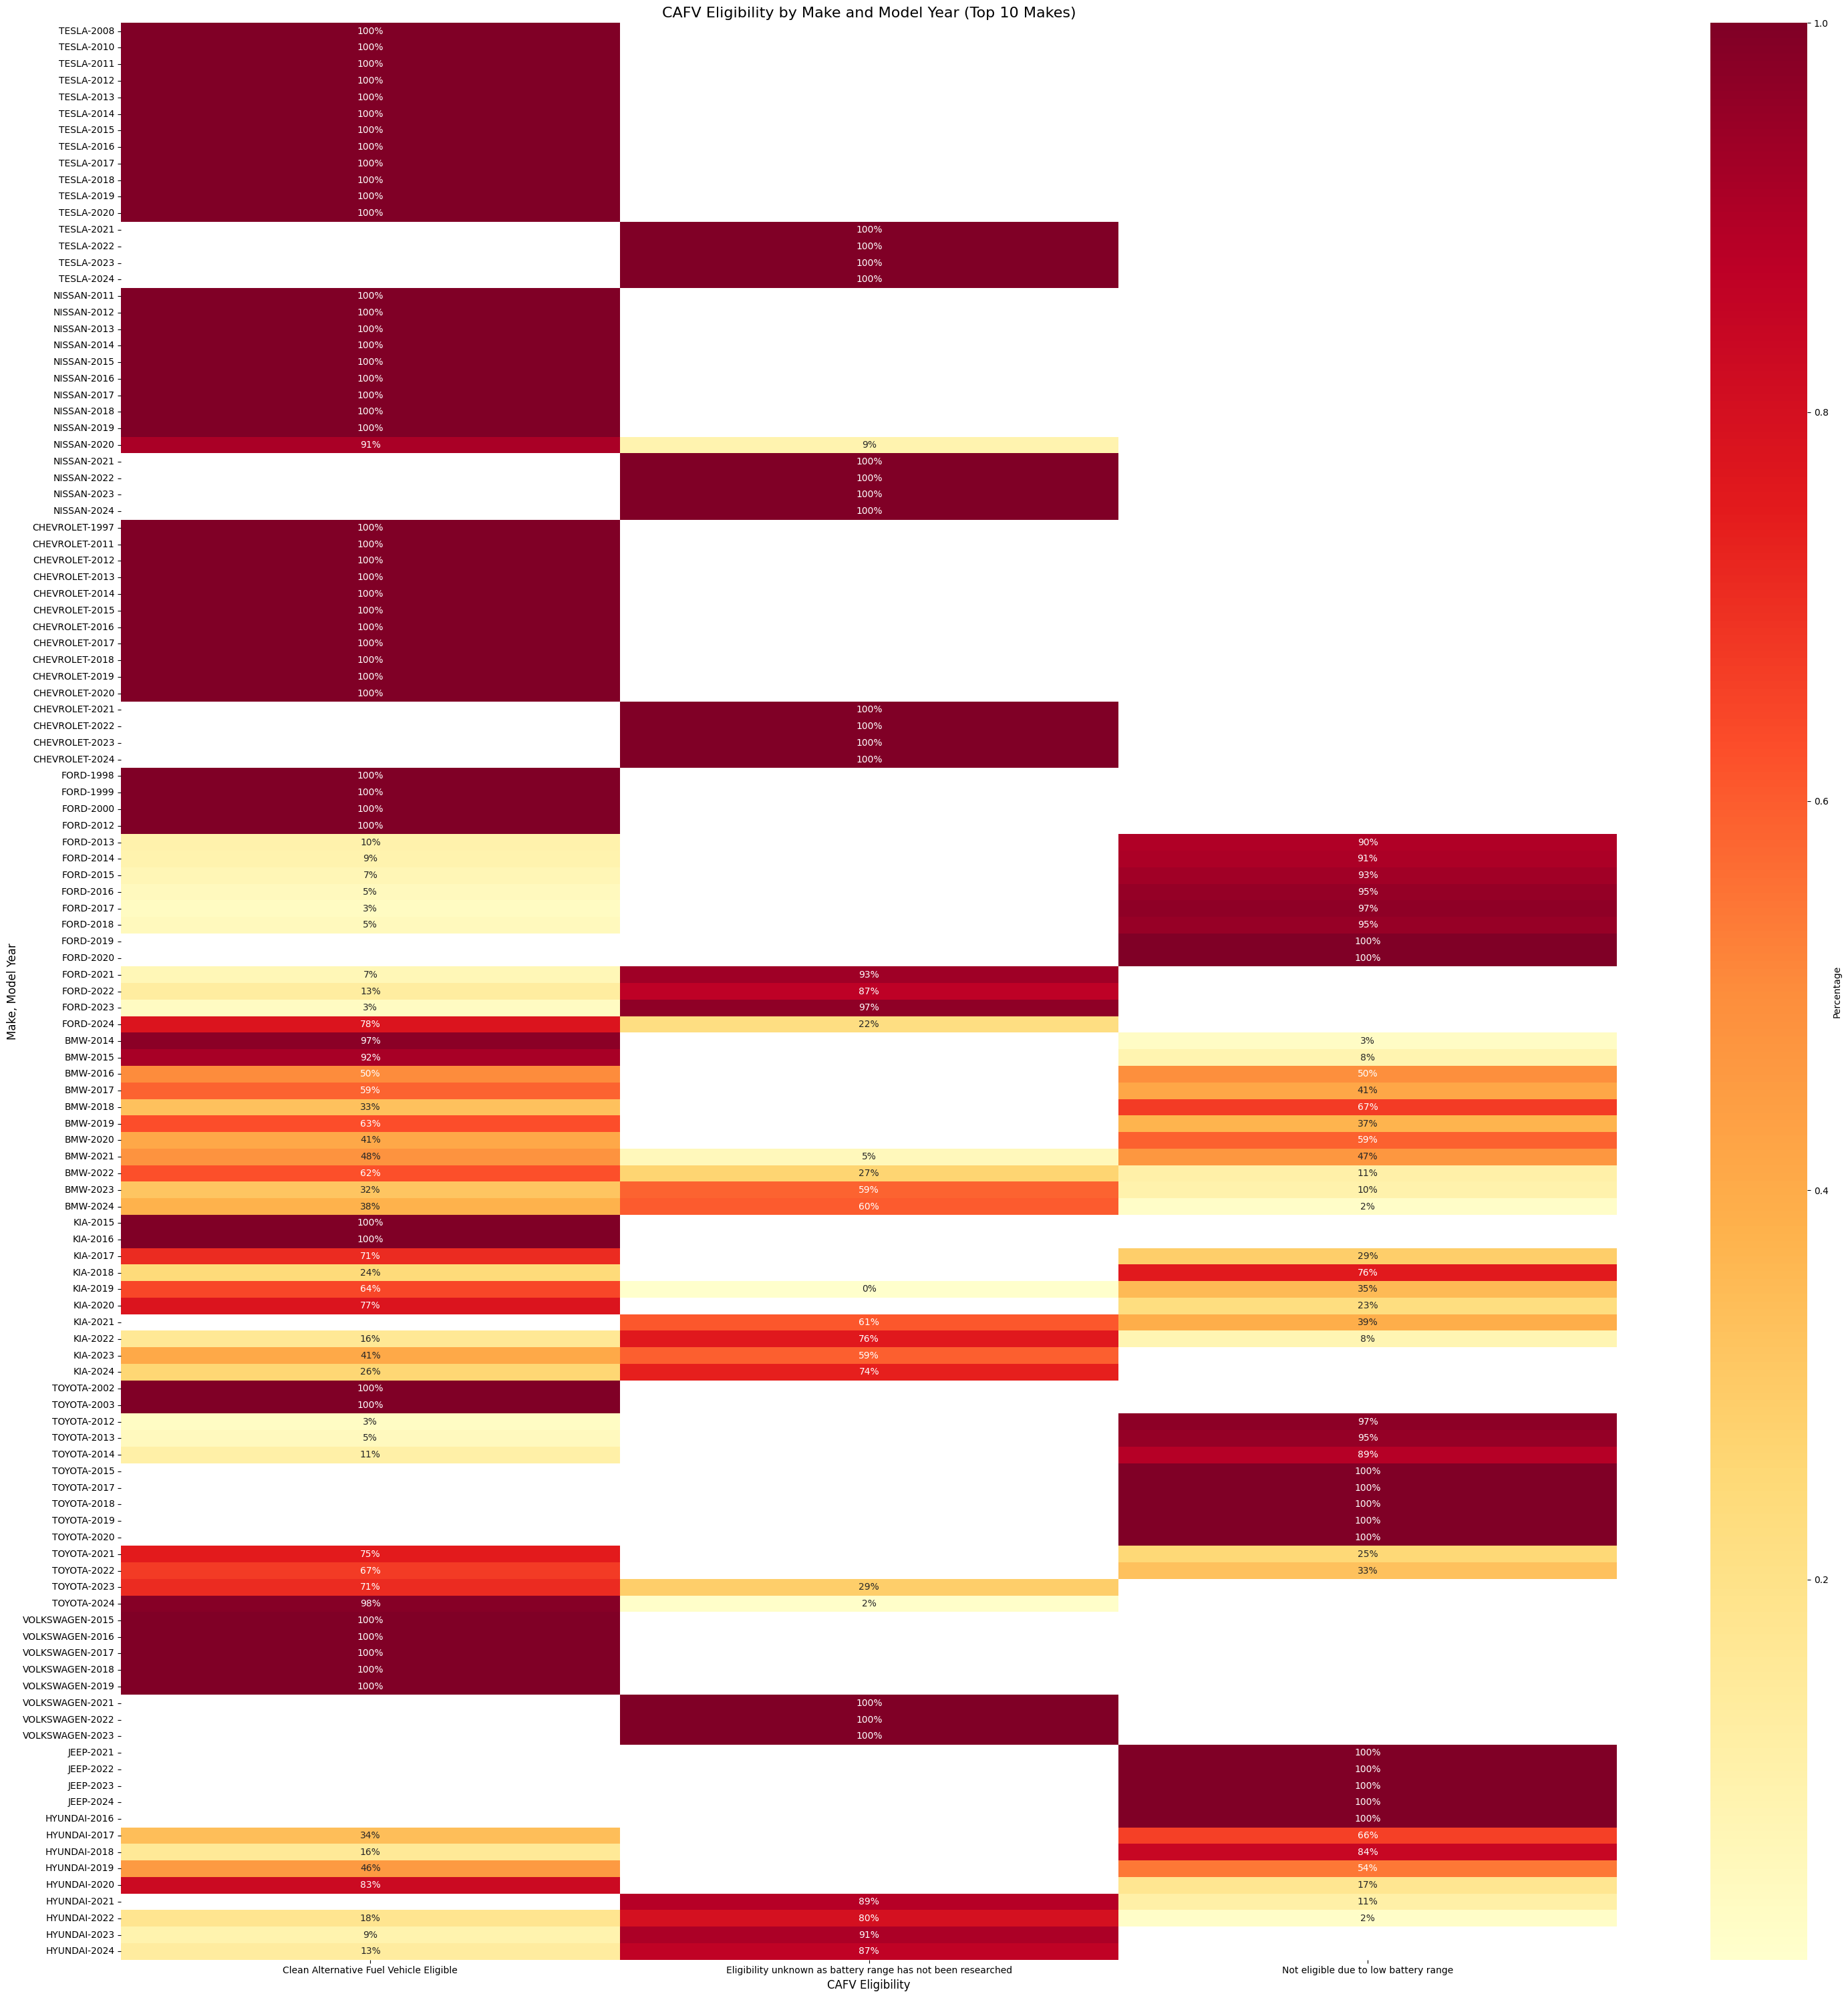

In [23]:
grouped = MAIN_DATA.groupby(['Make', 'Model Year'])['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True).unstack()

# Picking top 15 to find some correlation
top_makes = MAIN_DATA['Make'].value_counts().nlargest(10).index
grouped_top = grouped.loc[top_makes]

plt.figure(figsize=(30, 30))
sns.heatmap(grouped_top, annot=True, fmt='.0%', cmap='YlOrRd', cbar_kws={'label': 'Percentage'})
plt.title('CAFV Eligibility by Make and Model Year (Top 10 Makes)', fontsize=16)
plt.xlabel('CAFV Eligibility', fontsize=12)
plt.ylabel('Make, Model Year', fontsize=12)
plt.tight_layout()
plt.show()